<br/>
Exercise12: k-means  
DataSciene (BHTB MIM 12 S18)  

Martina Ahlswede  
<br/>  


In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (16, 9)


.

In [3]:
df = pd.read_csv('edlich-kmeans-A0.csv')

In [4]:
df.sample(10)

,V1,V2,V3
54,6.845733,2.835562,4.428559
95,5.240474,2.983800,5.104915
33,4.478608,9.960070,-10.756151
61,-5.215827,4.258524,3.990111
26,-0.974766,2.974787,-8.530088
81,2.979564,8.849698,-7.787063
16,-3.070769,1.479535,-7.798505
66,-5.054178,5.740377,3.168962
18,-4.428477,6.656869,4.008960
30,-1.706179,1.666012,-7.926855


In [5]:
X = df.values[0:100]

In [6]:
y = df.values[:,1]

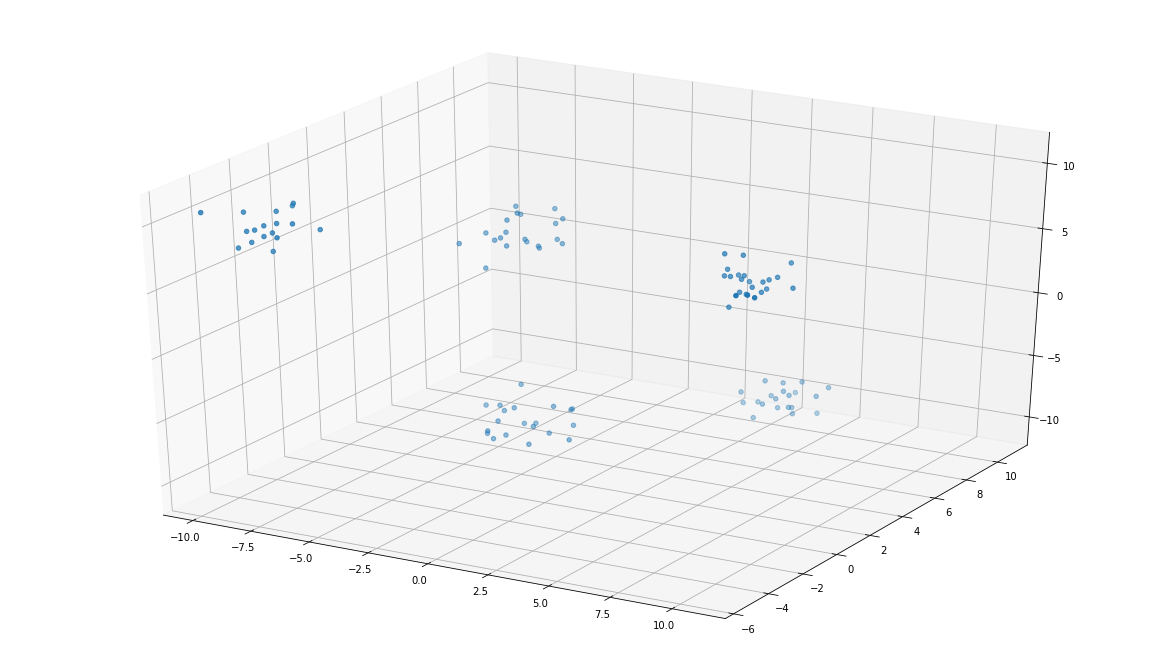

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])                       

due to graphic above we should use **k = 5**

In [10]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

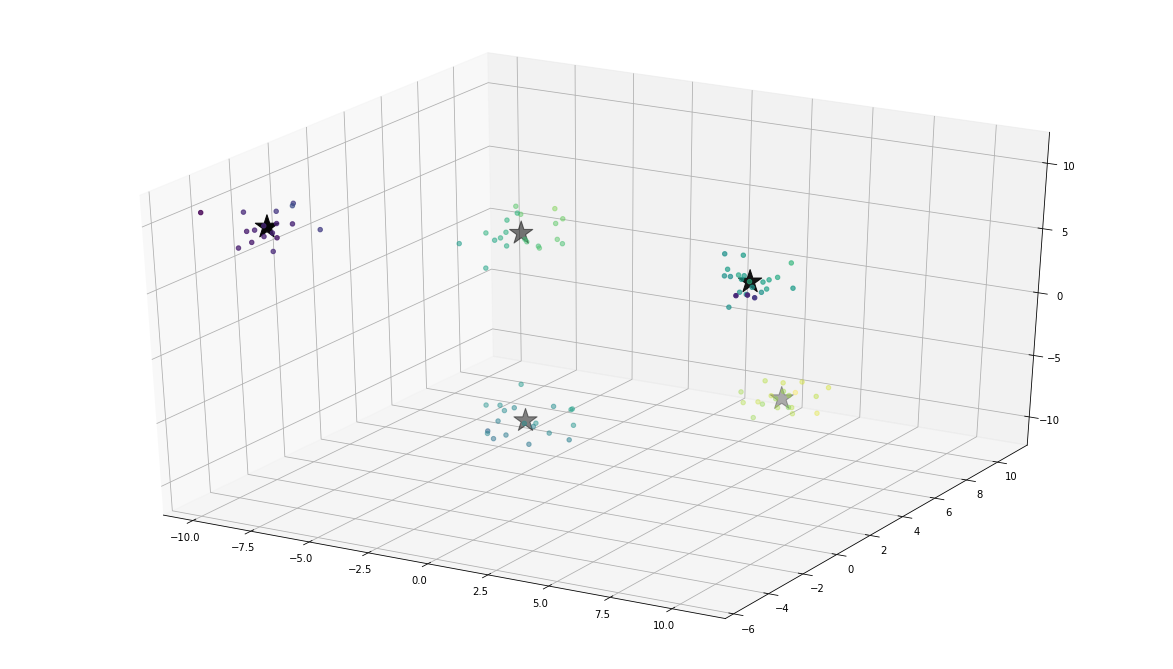

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=600)

<br/><br/><br/>

In [12]:
# our centers
C

array([[ 3.66536804,  8.91074968, -9.06579829],
       [-5.10691526,  5.60179825,  3.71956936],
       [-8.53242046, -3.55401526,  8.96857685],
       [ 6.47155208,  2.70446035,  5.19967608],
       [-2.40331671,  2.14752865, -8.02378894]])

<br/>
//

The clustering vector

suggestions from https://mubaris.com/2017/10/01/kmeans-clustering-in-python/  
.

In [13]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [14]:
clusters = np.zeros(len(X))

In [15]:
# Assigning each value to its closest cluster
for i in range(len(X)):
    distances = dist(X[i], C)
    cluster = np.argmin(distances)
    clusters[i] = cluster

In [16]:
# Show the clustering vector
clusters

array([1., 2., 2., 3., 2., 0., 3., 2., 4., 3., 2., 4., 3., 0., 1., 2., 4.,
       0., 1., 1., 2., 4., 1., 2., 2., 3., 4., 4., 4., 0., 4., 4., 0., 0.,
       2., 1., 0., 1., 4., 2., 0., 0., 0., 1., 0., 2., 3., 3., 0., 3., 3.,
       0., 4., 4., 3., 3., 1., 3., 2., 0., 3., 1., 3., 3., 0., 3., 1., 1.,
       1., 0., 0., 3., 4., 3., 3., 4., 2., 0., 3., 4., 4., 0., 2., 1., 1.,
       2., 1., 1., 1., 3., 4., 4., 4., 2., 3., 3., 4., 0., 1., 1.])

In [17]:
# 1. Cluster (#0)
C[0], X[3], X[6], X[9], "..."

(array([ 3.66536804,  8.91074968, -9.06579829]),
 array([5.7082258 , 2.65857479, 5.40448245]),
 array([6.37219562, 4.45994039, 4.36935755]),
 array([5.62156138, 3.43105644, 4.66657363]),
 '...')

In [18]:
# 2. Cluster (#1)
C[1], X[8], X[11], X[16], "..."

(array([-5.10691526,  5.60179825,  3.71956936]),
 array([-3.40526552,  2.28142739, -7.63117179]),
 array([-4.61692581,  2.83368789, -7.96289974]),
 array([-3.07076859,  1.47953458, -7.79850529]),
 '...')

In [19]:
# 3. Cluster (#2)
C[2], X[1], X[2], X[4], "..."

(array([-8.53242046, -3.55401526,  8.96857685]),
 array([-9.58706542, -3.43446551,  9.70183939]),
 array([-8.38501223, -3.90279369,  8.51462008]),
 array([-7.43166517, -4.39025105,  9.00321635]),
 '...')

In [20]:
# 4. Cluster (#3)
C[3], X[0], X[14], X[18], "..."

(array([6.47155208, 2.70446035, 5.19967608]),
 array([-5.34023562,  4.7472463 ,  3.82332607]),
 array([-5.1795348 ,  4.8463202 ,  4.24721594]),
 array([-4.42847662,  6.65686938,  4.00895955]),
 '...')

In [21]:
# 5. Cluster (#4)
C[4], X[5], X[13], X[17], "..."

(array([-2.40331671,  2.14752865, -8.02378894]),
 array([ 5.028509  ,  9.04769521, -8.54843651]),
 array([ 3.70343606,  8.61137549, -9.59257599]),
 array([ 4.00128095,  9.65877107, -8.12242599]),
 '...')

//